In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=24)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

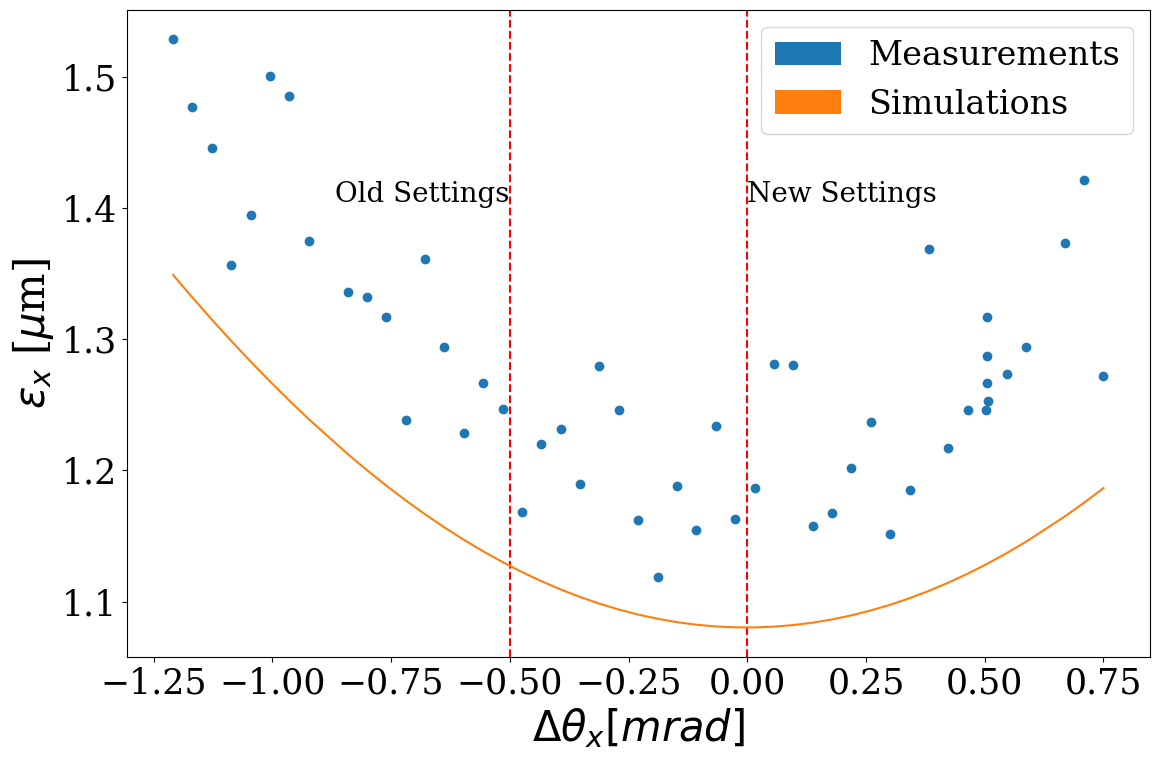

In [58]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = np.load('results/optimize_angles.npz')

# Access the shifted_angles and filter_horizontal arrays
shifted_angles = data['shifted_angles']
filter_horizontal = data['filter_horizontal']



cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

final_emittance_simulations_list=[]
final_emittance_simulations_list2=[]
plt.figure(figsize=(12, 8))  # Create a figure for plotting

plt.scatter(shifted_angles,filter_horizontal,label='measurments')
for i,angle_values in enumerate(shifted_angles):
    # data = np.load(f'results/angle_x/vertical/ELENA_angle{angle_values}.npz')

    # # Extract the data using the keys used when saving
    # v_delay_unique = data['v_delay_unique']
    # v_delay_unique_shifted = v_delay_unique[1:]
    # v_delay_unique_shifted=v_delay_unique_shifted-v_delay_unique_shifted[0]

    # means_v = data['means_v']
    # stds_v = data['stds_v']
    # angle_values = data['angle_values']  # Assuming angle_values contains multiple values or a single value
    # plt.errorbar(v_delay_unique_shifted/1000,means_v[1:],yerr=stds_v[1:],
    # label=f'$\\theta_x$={-angle_values} mrad',color=cycle[i])

    data = np.load(f'results/optimize_angles/angle_{angle_values}.npz')
    # Extract data arrays
    time = data['time']
    norm_emittance_x = data['norm_emittance_x']
    geo_emittance_x = data['geo_emittance_x']
    norm_emittance_y = data['norm_emittance_y']
    geo_emittance_y = data['geo_emittance_y']

    geo_emittance_x2 = data['geo_emittance_x2']

    final_emittance_x=geo_emittance_x[-1]*1e6
    final_emittance_x2=geo_emittance_x2[-1]*1e6
    final_emittance_simulations_list.append(final_emittance_x)
    final_emittance_simulations_list2.append(final_emittance_x2)

    # sigma_x_all_angles = np.array([np.sqrt(beta_x * geo_emittance_x) for angle in angle_list])
    # sigma_x_95 = np.percentile(sigma_x_all_angles, 95, axis=0)

   
    # Plot the standard deviation of x over time for the current angle
        

legend_handles = [
Patch(facecolor=cycle[0],  label='Measurements'),
Patch(facecolor=cycle[1],  label='Simulations'),
#Patch(facecolor=cycle[2],  label='Simulations without removing dispersion'),
]

#
# # Plot simulations and find where emittance is closest to zero
# closest_to_zero_index = np.argmin(np.abs(shifted_angles+0.0255102))
# closest_to_zero_angle = shifted_angles[closest_to_zero_index]
# closest_to_zero_emittance = filter_horizontal[closest_to_zero_index]


# Add custom point at the location closest to zero emittance
plt.axvline(x=0, color='red', linestyle='--')
plt.text(0, 1.4, 'New Settings', ha='left', va='bottom')

# # Find where emittance is closest to -0.5
# closest_to_neg_half_index = np.argmin(np.abs(shifted_angles + 0.5))
# closest_to_neg_half_angle = shifted_angles[closest_to_neg_half_index]
# closest_to_neg_half_emittance = filter_horizontal[closest_to_neg_half_index]

# Add custom point at the location closest to -0.5 emittance
plt.axvline(x=-0.50, color='red', linestyle='--')
plt.text(-0.50, 1.4, 'Old Settings', ha='right', va='bottom')

shifted_angles_sorted, final_emittance_simulations_list_sorted = zip(*sorted(zip(shifted_angles, final_emittance_simulations_list)))
shifted_angles_sorted2, final_emittance_simulations_list_sorted2 = zip(*sorted(zip(shifted_angles, final_emittance_simulations_list2)))

plt.plot(shifted_angles_sorted, final_emittance_simulations_list_sorted, color=cycle[1])
#plt.plot(shifted_angles_sorted2, final_emittance_simulations_list_sorted2, color=cycle[2])
#plt.plot(shifted_angles,final_emittance_simulations_list,color=cycle[1])

# Add the legend with custom handles
plt.legend(handles=legend_handles, loc='best')
#plt.errorbar(v_delay_unique,means_v,yerr=stds_v,label='vertical')
plt.xlabel('$\Delta \\theta_x [mrad]$')
plt.ylabel('$\epsilon_x$ [$\mu$m]')
#plt.legend()
plt.tight_layout()
plt.savefig('figures/Optimization_angle_x.png', dpi=300)
plt.show()

In [59]:
geo_emittance_y[0]

2.5240301687185936e-06